In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.0.1



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%watermark --iversions

matplotlib: 3.5.1
numpy     : 1.22.2
pandas    : 1.4.1



**WW-site**
- sampleTypeDefault (rawWW, NA or pstGrit after treatments headworks)
- sampleCollectionDefault (TP time proportional; FP flow proportional)

**WW-measure**
- sampleID (locationID : date) 
- type (SARS-CoV-2 nucleocapsid gene N1 or N2; Pepper mild mottle virus)

**WW-site_measure**
- uSiteMeasureID (tss, flow, tmp, pH)

**WW-polygon**
- pop - population

In [11]:
df = pd.read_csv('data/WW-measure.csv')
df.head()

,uWWMeasureID,reportDate,sampleID,type,value,unit,fractionAnalyzed,aggregation,qualityFlag,reporterID,...,accessToProvHA,accessToOtherProv,analysisDate,typeOther,unitOther,aggregationOther,index,accessToSelf,accessToDetails,notes
0,covN1TAB,2021-04-09,TAB_20210401,covN1,52.530044,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,covN1TAB,2021-04-09,TAB_20210404,covN1,74.892574,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,covN1THC,2021-04-09,THC_20210401,covN1,141.213565,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,covN1THC,2021-04-09,THC_20210404,covN1,150.366354,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,covN1THU,2021-04-09,THU_20210401,covN1,53.621250,gcML,solid,mean,0,PHACCM,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['date'] = pd.to_datetime(df['sampleID'].apply(lambda d: d.split('_')[1])).rename('date')
df = df.set_index('date')

In [13]:
print(df['type'].unique())
print(df['uWWMeasureID'].unique())
print(df['unit'].unique())

['covN1' 'covN2' 'nPPMoV']
['covN1TAB' 'covN1THC' 'covN1THU' 'covN1TNT' 'covN1EGB' 'covN1VAI'
 'covN1VII' 'covN1VLG' 'covN1VLI' 'covN1VNL' 'covN1MMN' 'covN1MMS'
 'covN1HDA' 'covN1HHA' 'covN1HMC' 'covN2TAB' 'covN2THC' 'covN2THU'
 'covN2TNT' 'covN2EGB' 'covN2VAI' 'covN2VII' 'covN2VLG' 'covN2VLI'
 'covN2VNL' 'covN2MMN' 'covN2MMS' 'covN2HDA' 'covN2HHA' 'covN2HMC'
 'PPMoVTAB' 'PPMoVTHC' 'PPMoVTHU' 'PPMoVTNT' 'PPMoVEGB' 'PPMoVVAI'
 'PPMoVVII' 'PPMoVVLG' 'PPMoVVLI' 'PPMoVVNL' 'PPMoVMMN' 'PPMoVMMS'
 'PPMoVHDA' 'PPMoVHHA' 'PPMoVHMC']
['gcML']


In [23]:
# select location
df2 = df[df['uWWMeasureID'].apply(lambda c: c.endswith('TAB'))]

# pivot table
df2 = df2.pivot_table('value', ['date'], 'uWWMeasureID')

Text(0, 0.5, 'nPPMoV (gcML)')

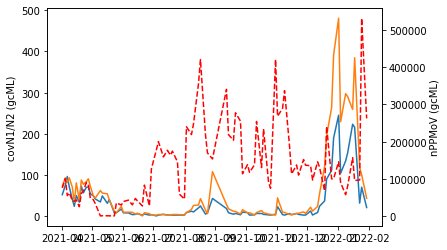

In [40]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

    
for i, col in enumerate(df2.columns):
    if i == 0:
        ax2.plot(df2[col], '--r')
    else:
        ax1.plot(df2[col])
        
plt.xticks(rotation=70)
ax1.set_ylabel('covN1/N2 (gcML)')
ax2.set_ylabel('nPPMoV (gcML)')

In [ ]:
## N1, N2 and PPMV are sequential
#df2 = df[df['uWWMeasureID'].apply(lambda ch: 'N2TAB' in ch)]

df[df['uWWMeasureID'] == 'covN1TAB']['value'].plot()
df[df['uWWMeasureID'] == 'covN2TAB']['value'].plot()
df[df['uWWMeasureID'] == 'PPMoVTAB']['value'].apply(lambda i: i / 1000.).plot()

In [ ]:
df[df['uWWMeasureID'].apply(lambda ch: 'TAB' in ch)]